# Supervised learning - linear regression

In this notebook, we 
* split the dataset into trian and test sets 
* build a pipeline for preprocessing and modeling 

In [1]:
## linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
## Import data
df = pd.read_csv('datasets/fish.csv')
df.head()

,species,vertical_len,diag_len,cross_len,height,width,weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


we want to predict the weight (in log space) of a fish given other inforamtion.
We will build a model with the remaining features as predictor

In [5]:
feature_names = df.columns.values[:-1] # get the feature column for easeir access 
# [:-1] means all values except the last one: the last one is weight
feature_names

array(['species', 'vertical_len', 'diag_len', 'cross_len', 'height',
       'width'], dtype=object)

Split data into predictors and reponse

In [8]:
X = df[feature_names]
Y = np.log(df['weight'])

Split samples into train and test sets (typically 80% to 20%)

In [9]:
# split samples into train and test sets (typically 80% to 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=0)


Preprocessing needed for the categorical and numerical data (standardization, rescaling, etc)
* preprocessing should only be applied to the train data to prevent data leakage 
* data leakage means the training process has infomation about the test set 

In [10]:
# preprocessing needed for the categorical and numerical data (standardization, rescaling, etc)
# preprocessing should only be applied to the train data
# data leakage means the training process has infomation about the test set 
X_train.describe(include = 'all')

,species,vertical_len,diag_len,cross_len,height,width
count,126,126.000000,126.000000,126.000000,126.000000,126.000000
unique,7,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN
freq,45,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.596032,27.717460,30.501587,8.831752,4.315787
std,NaN,9.668046,10.377037,11.326288,4.420481,1.706681
min,NaN,7.500000,8.400000,8.800000,1.728400,1.148400
25%,NaN,19.000000,21.000000,22.575000,5.731975,3.335100
50%,NaN,24.550000,26.500000,29.150000,7.469800,4.181100
75%,NaN,32.325000,35.000000,39.450000,12.266550,5.284075


Standardization for numerical data 

In [11]:
# standardization for numerical data  (example)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train[['height']])
train_scaled = scaler.transform(X_train[['height']])
np.mean(train_scaled)

8.414785623150988e-17

In [12]:
test_scaled = scaler.transform(X_test[['height']])
np.mean(test_scaled)

0.17386194582393663

Standardization for categorical data (species) 

In [16]:
# standardization for categorical data (species) 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# creating pipelines for one hot encoder and applying standard scaler to numerical variables 
categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder())])
numerical_transformer = Pipeline(steps = [('scaler',StandardScaler())])

Combining pipelines

In [17]:
# combining pipelines 
# define columns 
categorical_columns = ['species']
numerical_columns = feature_names[1:]
numerical_columns


array(['vertical_len', 'diag_len', 'cross_len', 'height', 'width'],
      dtype=object)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
categorical_columns = ['species']
numerical_columns = feature_names[1:]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns), #(chosen_name, Pipeline, columns_to_apply_to)
        ('cat', categorical_transformer, categorical_columns)])
model = Pipeline(steps = [('preprocessor',preprocessor), ('regressor',LinearRegression())])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['vertical_len', 'diag_len', 'cross_len', 'height', 'width'],
      dtype=object)),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['species'])])),
                ('regressor', LinearRegression())])

Fit model to data/learn weights, and predict using learned models

In [19]:
model.fit(X_train, Y_train);
Y_pred = model.predict(X_test);

Compare predictions and true values

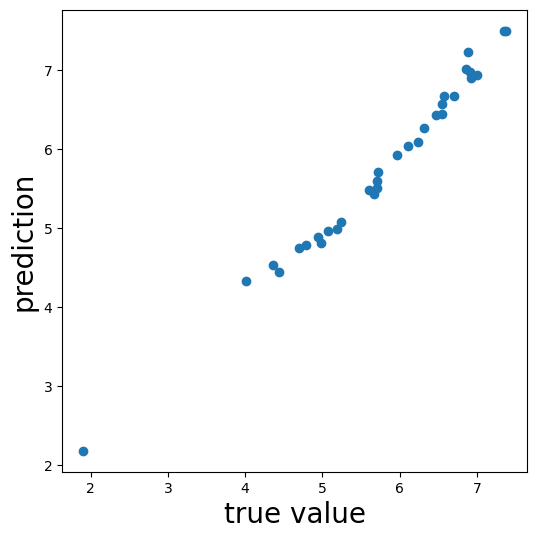

In [20]:
fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(Y_test,Y_pred)
ax.set_xlabel('true value', fontsize=20)
ax.set_ylabel('prediction', fontsize=20)
plt.show()


Access and intepret learned weights

In [24]:
# Create a nice dataframe to store all the model coefficients (not including intercept)
labels = list(model['preprocessor'].transformers_[0][2]) + list(model['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns))

coefs = pd.DataFrame(
    model[1].coef_,
    columns=["Coefficients"],
    index=labels,
)

In [25]:
# To access intercept or bias
model[1].intercept_

5.296093966873677

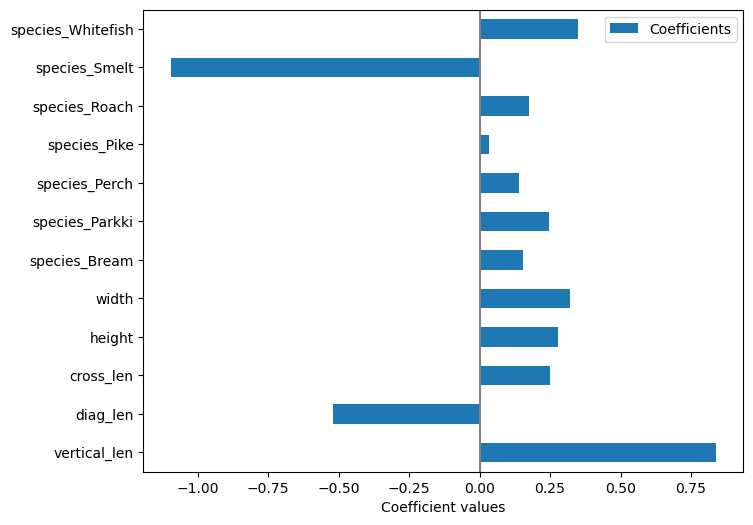

In [26]:
coefs.plot.barh(figsize=(10, 6))
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

Two measures to evaluate learned models:

* the mean squared error $$
MSE = \frac{1}{M} (y_{pred} - y_{obs})^2
$$

* the $R^2$ score. It represents the proportion of the response's variance that has been explained by the predictors. Best possible score is 1.


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

# r2s = 
r2s = r2_score(Y_test,Y_pred)
print(r2s)

0.022032507964441207
0.9832007220632911
